## Chapter 6 - Exercise 1: Bank
- Sử dụng tập dữ liệu bank.csv chứa thông tin liên quan đến các chiến dịch tiếp thị trực tiếp -
the direct marketing campaigns (dựa trên các cuộc gọi điện thoại) của một tổ chức ngân hàng
Bồ Đào Nha. Thông thường, cần có nhiều contact cho cùng một khách hàng, để truy cập xem
liệu có sản phẩm (tiền gửi ngân hàng có kỳ hạn - bank term deposit) sẽ được đăng ký (yes)
hay không (no). Tập dữ liệu chứa một số thông tin khách hàng (như age, job...) và thông tin
liên quan đến chiến dịch (chẳng hạn như contact hoặc communication type, day, month và
duration của contact...).
- Đối với chiến dịch tiếp thị tiếp theo, công ty muốn sử dụng dữ liệu này và chỉ liên hệ với
những khách hàng tiềm năng sẽ đăng ký tiền gửi có kỳ hạn, do đó giảm bớt nỗ lực cần thiết
để liên hệ với những khách hàng không quan tâm. Để làm được điều này, cần tạo một mô
hình có thể dự đoán liệu khách hàng có đăng ký tiền gửi có kỳ hạn hay không (y).

### Yêu cầu:
- Đọc dữ liệu, tìm hiểu sơ bộ về dữ liệu. Chuẩn hóa dữ liệu nếu cần
- Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
- Áp dụng Decision Tree, Tìm kết quả.
- Kiểm tra độ chính xác
- Trực quan hóa Decision Tree
- Đánh giá mô hình.
- Ghi mô hình nếu mô hình phù hợp

In [3]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv("data/bank.csv", sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4330,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4331,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4332,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4334 non-null   int64 
 1   job        4334 non-null   object
 2   marital    4334 non-null   object
 3   education  4334 non-null   object
 4   default    4334 non-null   object
 5   balance    4334 non-null   int64 
 6   housing    4334 non-null   object
 7   loan       4334 non-null   object
 8   contact    4334 non-null   object
 9   day        4334 non-null   int64 
 10  month      4334 non-null   object
 11  duration   4334 non-null   int64 
 12  campaign   4334 non-null   int64 
 13  pdays      4334 non-null   int64 
 14  previous   4334 non-null   int64 
 15  poutcome   4334 non-null   object
 16  y          4334 non-null   object
dtypes: int64(7), object(10)
memory usage: 575.7+ KB


<IPython.core.display.Javascript object>

In [9]:
"""
=> dataset ko có giá trị null
"""

'\n=> dataset ko có giá trị null\n'

<IPython.core.display.Javascript object>

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,40.991924,1410.637517,15.913936,264.544301,2.806876,39.670974,0.544070
std,10.505378,3010.612091,8.216673,260.642141,3.129682,99.934062,1.702219
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,440.000000,16.000000,186.000000,2.000000,-1.000000,0.000000
75%,48.000000,1464.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<IPython.core.display.Javascript object>

In [11]:
"""
Sử dụng decision tree 
=> preditor variables: các biến dc chuẩn hóa sang kiểu số
target: có thể ở dạng label hay kiểu số
"""

'\nSử dụng decision tree \n=> preditor variables: các biến dc chuẩn hóa sang kiểu số\ntarget: có thể ở dạng label hay kiểu số\n'

<IPython.core.display.Javascript object>

# chuẩn hóa dữ liệu (predictors)

In [30]:
df_new = df.copy()
df_new.replace(
    [
        "oct",
        "may",
        "apr",
        "jun",
        "feb",
        "aug",
        "jan",
        "jul",
        "nov",
        "sep",
        "mar",
        "dec",
    ],
    list(range(1, 12 + 1)),
    inplace=True,
)

<IPython.core.display.Javascript object>

In [33]:
obj_lst = [i for i in df.columns if df.dtypes[i] == "object"]
obj_lst

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

<IPython.core.display.Javascript object>

In [138]:
X = df_new.drop(columns=["y"])
# y = df_new["y"]
y = df_new["y"].apply(lambda x: 0 if x == "no" else 1)

<IPython.core.display.Javascript object>

In [139]:
"""
'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 là các features có kiểu obj
 
 => chuyển sang numeric
"""

"\n'job',\n 'marital',\n 'education',\n 'default',\n 'housing',\n 'loan',\n 'contact',\n 'month',\n 'poutcome',\n là các features có kiểu obj\n \n => chuyển sang numeric\n"

<IPython.core.display.Javascript object>

In [140]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe = ohe.fit(
    X[
        [
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
            "poutcome",
        ]
    ]
)
ohe

OneHotEncoder()

<IPython.core.display.Javascript object>

In [141]:
X_ohe = ohe.transform(
    X[
        [
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
            "poutcome",
        ]
    ]
)
X_ohe

<4334x31 sparse matrix of type '<class 'numpy.float64'>'
	with 34672 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

In [142]:
X_ohe_new = X_ohe.toarray()
X_ohe_new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

<IPython.core.display.Javascript object>

In [143]:
ohe_cols = ohe.get_feature_names(
    ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]
)

<IPython.core.display.Javascript object>

In [144]:
X_ohe_new = pd.DataFrame(X_ohe_new, columns=ohe_cols)
X_ohe_new.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

In [145]:
# dùng hàm cho nhanh nè
def OneHotEncoder_Dataset(dataset):
    ohe = OneHotEncoder().fit(dataset)
    X_ohe_new = ohe.transform(dataset).toarray()
    ohe_cols = ohe.get_feature_names(dataset.columns)
    return pd.DataFrame(X_ohe_new, columns=ohe_cols)

<IPython.core.display.Javascript object>

In [146]:
a = OneHotEncoder_Dataset(
    df[
        [
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
            "poutcome",
        ]
    ]
)

<IPython.core.display.Javascript object>

In [147]:
a.equals(X_ohe_new)

True

<IPython.core.display.Javascript object>

In [148]:
X_new = pd.concat(
    [
        X[
            [
                "age",
                "balance",
                "day",
                "month",
                "duration",
                "campaign",
                "pdays",
                "previous",
            ]
        ],
        X_ohe_new,
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [149]:
X_new

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,1,79,1,-1,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,2,220,1,339,4,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,3,185,1,330,1,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,1476,3,4,199,4,-1,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,0,5,2,226,1,-1,0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33,-333,30,8,329,5,-1,0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4330,57,-3313,9,2,153,1,-1,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4331,57,295,19,6,151,11,-1,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4332,28,1137,6,5,129,4,211,3,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

In [150]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4334 non-null   int64  
 1   balance              4334 non-null   int64  
 2   day                  4334 non-null   int64  
 3   month                4334 non-null   int64  
 4   duration             4334 non-null   int64  
 5   campaign             4334 non-null   int64  
 6   pdays                4334 non-null   int64  
 7   previous             4334 non-null   int64  
 8   job_admin.           4334 non-null   float64
 9   job_blue-collar      4334 non-null   float64
 10  job_entrepreneur     4334 non-null   float64
 11  job_housemaid        4334 non-null   float64
 12  job_management       4334 non-null   float64
 13  job_retired          4334 non-null   float64
 14  job_self-employed    4334 non-null   float64
 15  job_services         4334 non-null   f

<IPython.core.display.Javascript object>

### Sử dụng Decision Tree

In [151]:
"""
target là category => sử dụng DecisionTreeClassifier
"""

'\ntarget là category => sử dụng DecisionTreeClassifier\n'

<IPython.core.display.Javascript object>

In [155]:
# chia tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42)

<IPython.core.display.Javascript object>

In [156]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

### Đánh Giá model

In [157]:
print("R_score: ", model.score(X_new, y))
print("Test R_score: ", model.score(X_test, y_test))
print("Train R_score: ", model.score(X_train, y_train))

R_score:  0.9672358098754038
Test R_score:  0.8690036900369004
Train R_score:  1.0


<IPython.core.display.Javascript object>

In [158]:
"""
chênh lệch giữa R_score của train và test cao 
=> overfitting
"""

'\nchênh lệch giữa R_score của train và test cao \n=> overfitting\n'

<IPython.core.display.Javascript object>

### Đánh giá model


In [189]:
# Đánh giá model
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [190]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[892  73]
 [ 69  50]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       965
           1       0.41      0.42      0.41       119

    accuracy                           0.87      1084
   macro avg       0.67      0.67      0.67      1084
weighted avg       0.87      0.87      0.87      1084



<IPython.core.display.Javascript object>

In [159]:
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(X_test)
print("ROC_AUC score using probabilities", probs)

ROC_AUC score using probabilities [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


<IPython.core.display.Javascript object>

In [160]:
scores = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

<IPython.core.display.Javascript object>

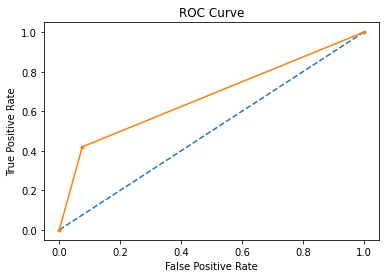

<IPython.core.display.Javascript object>

In [161]:
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr, tpr, marker=".")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [162]:
auc(fpr, tpr)

0.6722601994165542

<IPython.core.display.Javascript object>

In [173]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import image

<IPython.core.display.Javascript object>

In [175]:
dot_data = tree.export_graphviz(model, out_file="bank.txt", feature_names=X_new.columns)
# graph = pydotplus.graph_from_dot_data(dot_data)
# image(graph.create_png())

<IPython.core.display.Javascript object>

In [178]:
# import matplotlib.pyplot as plot
# import imageio

# photo_data = imageio.imread("bank.png")
# plot.figure(figsize=(20, 20))
# plot.imshow(photo_data)

<IPython.core.display.Javascript object>

### Có giải pháp nào tốt hơn không?

In [179]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [180]:
standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

<IPython.core.display.Javascript object>

In [182]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_sc_resampled, y_resampled)

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

In [183]:
tree_model.score(X_train_sc_resampled, y_resampled)

1.0

<IPython.core.display.Javascript object>

In [184]:
tree_model.score(X_test_sc, y_test)

0.8597785977859779

<IPython.core.display.Javascript object>

In [185]:
# Cũng còn overfitting

<IPython.core.display.Javascript object>

In [186]:
y_pred1 = tree_model.predict(X_test_sc)

<IPython.core.display.Javascript object>

In [187]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[882  83]
 [ 69  50]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       965
           1       0.38      0.42      0.40       119

    accuracy                           0.86      1084
   macro avg       0.65      0.67      0.66      1084
weighted avg       0.87      0.86      0.86      1084



<IPython.core.display.Javascript object>

In [188]:
# Kết quả không cải thiện nhiều

<IPython.core.display.Javascript object>